<a href="https://colab.research.google.com/github/kirubanath/computer-vision/blob/main/CV_LA3_Master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Assignment 3

**Computer Vision** - Term 5, 2022

Instructor: Dr. Saumya Jetley <br>
TAs: Ribhu Lahiri, Raghav Awasty

For reference: 
* Defining the hough transform to detect lines and circles in an image

### Task 1: Creating and applying Hough filter

**Implement Hough Transform**

Create a Hough Transform to detect lines in a given image. It might not be perfect due to the hyperparameters you pick but your goal should be to implement the function.

Feel free to use the inbuilt opencv canny method.

In [ ]:
# Imports 
import cv2
import gdown
import numpy as np
import pandas as pd
import scipy.fftpack as fp
import matplotlib.pyplot as plt

id = "1oIK5OKyx-J82R0LR2g3-8w7YAUB-L6ra"
gdown.download(id=id, output='cube.jpeg', quiet=True)
id = "1S2qR2RVR7koCVs6lxj77pZv3cmmBY0Ya"
gdown.download(id=id, output='lines.jpeg', quiet=True)
id = "1B-SvxL56BK79jkiaP54T7iJpQzpDXc5i"
gdown.download(id=id, output='coin.jpeg', quiet=True)

'coin.jpeg'

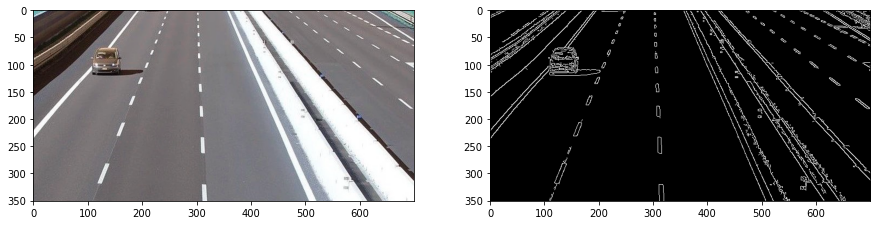

In [ ]:
# Step 1: Load the image
img = cv2.imread('./lines.jpeg')

# Step 2: Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 3: Apply edge detection using Canny
edges = cv2.Canny(gray, 100, 200, apertureSize=3)

fsize = (15, 8)
plt.figure(figsize = fsize)
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(edges, 'gray')
plt.show()

In [ ]:
def houghLine(image):
    '''
    Basic Hough line transform that builds the accumulator array
    
    Input: 
    image: ndarray
        edge image (canny)
    
    Output: 
    accumulator: ndarray
        the accumulator of hough space
             
    thetas: ndarray
        values of theta (-90 : 90)
             
    rs: ndarray
        values of radius (-max distance : max distance)
    '''

    # Step 4: Define the Hough space parameters
    # Get image dimensions
    Ny, Nx = image.shape

    # Max distance is the diagonal 
    Maxdist = int(np.round(np.sqrt(Nx**2 + Ny**2)))

    # Theta in range from -90 to 90 degrees
    thetas = np.deg2rad(np.arange(-90, 90))

    # Range of radius
    rhos = np.linspace(-Maxdist, Maxdist, 2*Maxdist)

    accumulator = np.zeros((2 * Maxdist, len(thetas)))

    # Step 5: Loop through all edge points and vote in the Hough space
    for y in range(Ny):
        for x in range(Nx):
            # Check if it is an edge pixel
            # y -> rows, x -> columns
            if image[y, x] > 0:
                # Map edge pixel to hough space
                for k in range(len(thetas)):
                    # Calculate space parameter
                    r = x*np.cos(thetas[k]) + y*np.sin(thetas[k])

                    # Update the accumulator
                    # r has value -max to max
                    # map r to its idx 0 : 2*max
                    accumulator[int(r) + Maxdist, k] += 1

    return accumulator, thetas, rhos

In [ ]:
# # Detect points that form a line
# lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=10, maxLineGap=250)
# # Draw lines on the image
# for line in lines:
#     x1, y1, x2, y2 = line[0]
#     cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
# Show result

accumulator, thetas, rhos = houghLine(edges)

In [ ]:
# Step 6: Find the most voted lines in the Hough space
def hough_simple_peaks(acc, n):
    '''
    A function that returns the number of indicies = n of the
    accumulator array H that correspond to local maxima.
    '''

    indices =  np.argpartition(acc.flatten(), -n)[-n:]
    return np.unravel_index(indices, acc.shape)
    # return np.vstack(np.unravel_index(indices, acc.shape)).T

indices = hough_simple_peaks(accumulator, 2)

# Step 7: Convert Hough space coordinates to image space coordinates
def hough_lines_draw(img, indices, rhos, thetas):
    '''
    A function that takes indices, a rhos table and thetas table and draws
    lines on the input images that correspond to these values.
    '''

    for i in range(len(indices)):
        # reverse engineer lines from rhos and thetas
        rho = rhos[indices[0][i]]
        theta = thetas[indices[1][i]]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        # these are then scaled so that the lines go off the edges of the image
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

hough_lines_draw(img, indices, rhos, thetas)

In [ ]:
indices

(array([1105, 1106]), array([57, 55]))

In [ ]:
np.vstack(indices).T

array([[1105,   57],
       [1106,   55]])

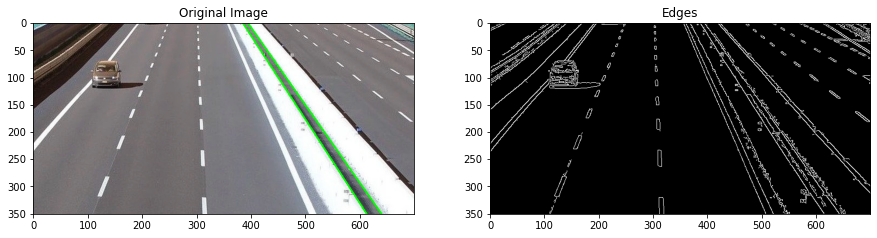

In [ ]:
fsize = (15, 8)
plt.figure(figsize = fsize)
plt.subplot(121), plt.imshow(img), plt.title('Original Image')
plt.subplot(122), plt.imshow(edges, 'gray'), plt.title('Edges')
plt.show()

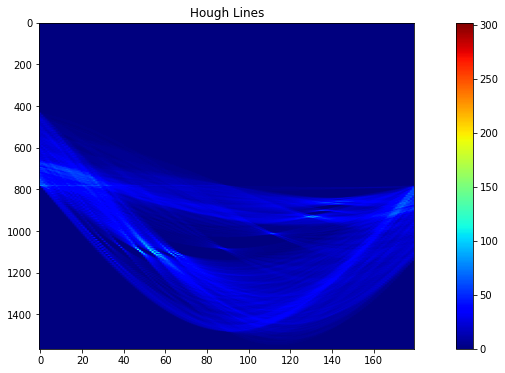

In [ ]:
fsize = (15, 6)
plt.figure(figsize = fsize)
plt.imshow(accumulator, cmap='jet', aspect = 0.1), plt.title('Hough Lines'), plt.colorbar()
plt.show()

### Task 2: Creating and applying Hough filter for circles

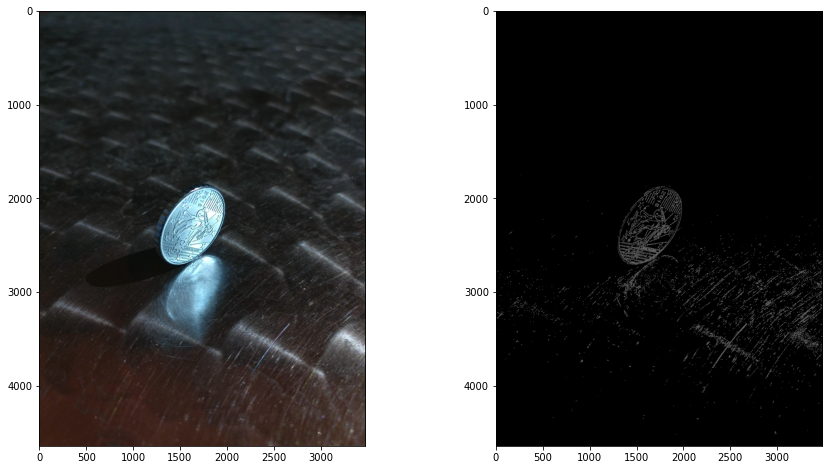

In [ ]:
# Step 1: Load the image
img = cv2.imread('./coin.jpeg')

# Step 2: Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 3: Apply edge detection using Canny
edges = cv2.Canny(gray, 150, 250, apertureSize=3)

fsize = (15, 8)
plt.figure(figsize = fsize)
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(edges, 'gray')
plt.show()